In [1]:
import math
import numpy as np
import networkx as nx

In [2]:
import matplotlib.pyplot as plt

params = {'legend.fontsize': 14,
          'figure.figsize': (14, 8),
         'axes.labelsize': 14,
         'axes.titlesize': 14,
         'xtick.labelsize': 12,
         'ytick.labelsize': 12}
plt.rcParams.update(params)

In [15]:
n = 100
m = 200
matrix = np.zeros((n, n))

def get_random_vertices_without_edge():
    while True:
        u, v = np.random.choice(list(range(n)), 2, replace=False)
        if matrix[u][v] == 0:
            return u, v

matrix = np.zeros((n, n))
for _ in range(m):
    u, v = get_random_vertices_without_edge()
    matrix[u][v] = matrix[v][u] = 1


In [7]:
g = [[] for _ in range(n)]
for u in range(n):
    for v in range(u + 1, n):
        if matrix[u][v] == 1:
            g[u].append(v)
            g[v].append(u)

print(matrix[0])
print(g[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[41, 50]


In [8]:
G = nx.Graph()
G.add_nodes_from(list(range(n)))
for u in range(n):
    for v in range(u + 1, n):
        if matrix[u][v] == 1:
            G.add_edge(u, v)
G.number_of_nodes(), G.number_of_edges()

(100, 200)

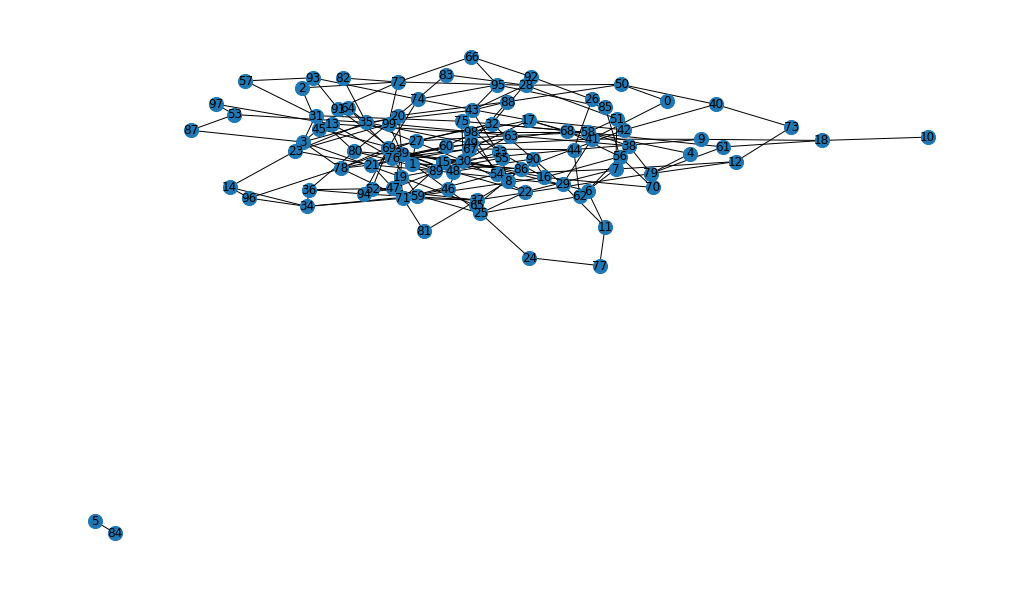

In [9]:
nx.draw(G, with_labels=True, node_size=200)

In [10]:
def find_short_path(a, b):
    if a == b:
        return [a]
    q = [a]
    inf = int(1e9)
    d = [inf] * n
    d[a] = 0
    while len(q) != 0:
        v, q = q[0], q[1:]
        for u in g[v]:
            if d[u] == inf:
                d[u] = d[v] + 1
                if u == b:
                    break
                q.append(u)
    path = [b]
    v = b
    while v != a:
        find_path = False
        for u in g[v]:
            if d[u] < d[v]:
                v = u
                find_path = True
                break
        if not find_path:
            return None
        path.append(v)
    return list(reversed(path))

In [11]:
u, v = np.random.choice(list(range(n)), 2, replace=False)
print(u, v)
path = find_short_path(u, v)
print(path)

20 92
[20, 3, 78, 27, 32, 92]


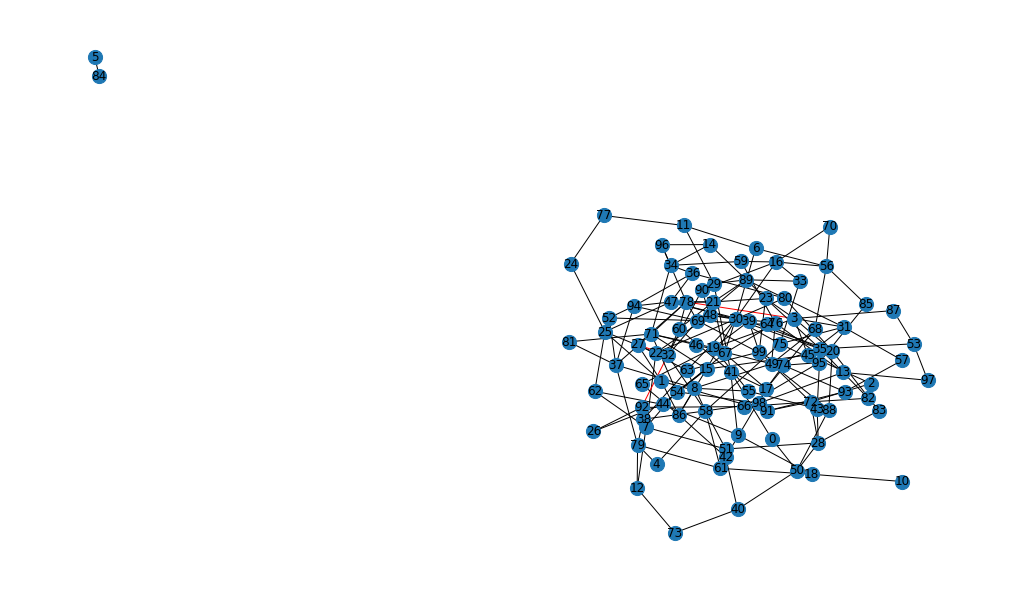

In [12]:
path_edges = []
for i in range(len(path) - 1):
    path_edges.append((path[i], path[i + 1]))
    
nx.draw(G, node_size=200, with_labels=True, edge_color=['r' if e in path_edges else 'k' for e in G.edges])

In [13]:
components = []
comps = [0] * n
c = 0
visited = [False] * n

def dfs(v):
    visited[v] = True
    comps[v] = c
    components[c].append(v)
    for u in g[v]:
        if not visited[u]:
            dfs(u)
            
for v in range(n):
    if not visited[v]:
        components.append([])
        dfs(v)
        c += 1

for c in components:
    print(c)


[0, 41, 9, 18, 10, 61, 58, 4, 79, 12, 7, 22, 25, 1, 27, 32, 60, 21, 23, 3, 19, 39, 20, 80, 30, 6, 11, 29, 89, 33, 16, 56, 68, 17, 42, 40, 50, 28, 43, 35, 49, 8, 37, 52, 69, 48, 76, 13, 97, 53, 87, 98, 54, 15, 44, 26, 92, 66, 72, 2, 45, 31, 57, 93, 74, 95, 75, 85, 91, 82, 99, 63, 38, 62, 67, 71, 34, 14, 96, 78, 36, 47, 94, 59, 46, 81, 86, 65, 90, 64, 55, 88, 51, 83, 73, 70, 77, 24]
[5, 84]


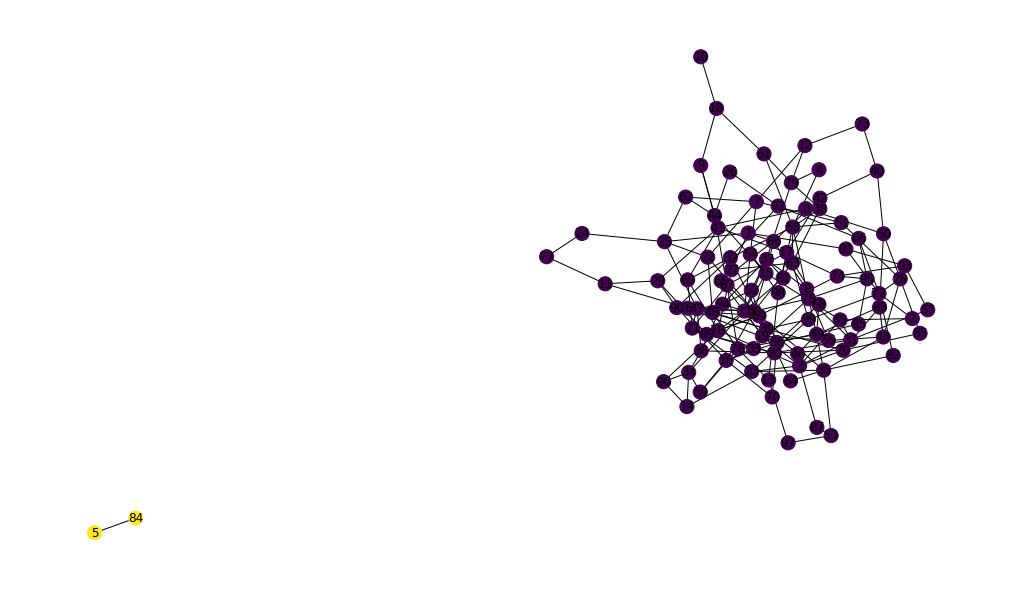

In [14]:
nx.draw(G, with_labels=True, node_color=comps, node_size=200)